소개 및 배경:

병원의 노쇼 문제와 평균 노쇼 비율(20.19%) 소개.

분석의 주요 질문: "노쇼 비율에 영향을 미치는 요인은 무엇인가?"

==============================================

예약기간 분석:

DaysDifference와 노쇼 비율의 관계.

예약 기간이 길수록 노쇼 비율이 높아지는 경향 확인.

결론: "예약 기간 관리가 노쇼 감소에 중요하다."

==============================================

SNS 수신 여부 분석:

SNS 수신이 노쇼 비율을 낮추는 데 기여.

결론: "SNS 알림 활용 확대 방안 필요."

==============================================

시간대 분석:

7-8시 시간대 예약과 낮은 노쇼 비율 패턴.

해결책: "해당 시간대 예약 확대 및 주말 적용 검토."

==============================================

#1.라이브러리 호출

In [33]:
%pip install koreanize-matplotlib

  Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl.metadata (992 bytes)
Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl (7.9 MB)

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import koreanize_matplotlib

#2.데이터프레임 불러오기

In [ ]:
# 파일 경로 수정할 것.
df = pd.read_csv('/Users/ansejun/Desktop/git/데이터분석/의료데이터 분석 경진대회/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#3.데이터 전처리

##3-1.예약일과 진료일의 차이 계산

In [4]:
# datetime 타입으로 변환
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# 날짜 차이 계산
df['DaysDifference'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

##3-2.요일 추가

In [5]:
df['ScheduledDay_Weekday'] = df['ScheduledDay'].dt.day_name()
df['AppointmentDay_Weekday'] = df['AppointmentDay'].dt.day_name()

##3-3.시간 추가

In [19]:
df['ScheduledHour'] = df['ScheduledDay'].dt.hour

In [20]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysDifference,ScheduledDay_Weekday,AppointmentDay_Weekday,ScheduledHour
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,34,Tuesday,Tuesday,9
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,34,Tuesday,Tuesday,7
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,40,Wednesday,Tuesday,16
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,40,Wednesday,Tuesday,15
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,40,Wednesday,Tuesday,13


#4.데이터 분석

In [ ]:
average_noshow_rate = (df['No-show'] == 'Yes').mean()
print(f"평균 노쇼 비율: {average_noshow_rate:.2%}")

평균 노쇼 비율: 20.19%


##4-1.예약기간 차이가 노쇼에 끼치는 영향

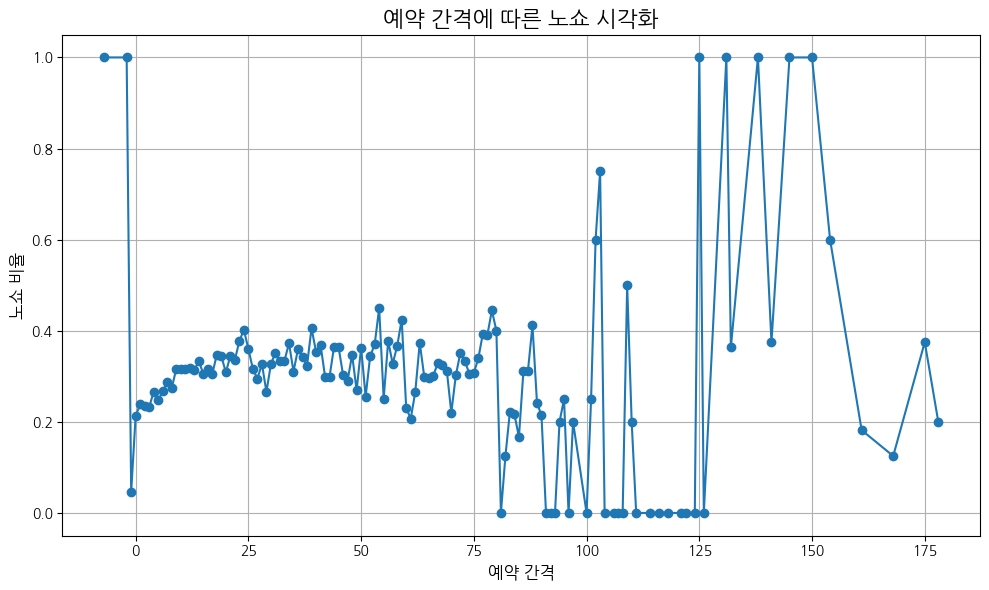

In [69]:
# 노쇼 비율 계산
days_difference_analysis = df.groupby('DaysDifference')['No-show'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(days_difference_analysis['DaysDifference'], days_difference_analysis['No-show'], marker='o')
plt.title('예약 간격에 따른 노쇼 시각화', fontsize=16)
plt.xlabel('예약 간격', fontsize=12)
plt.ylabel('노쇼 비율', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

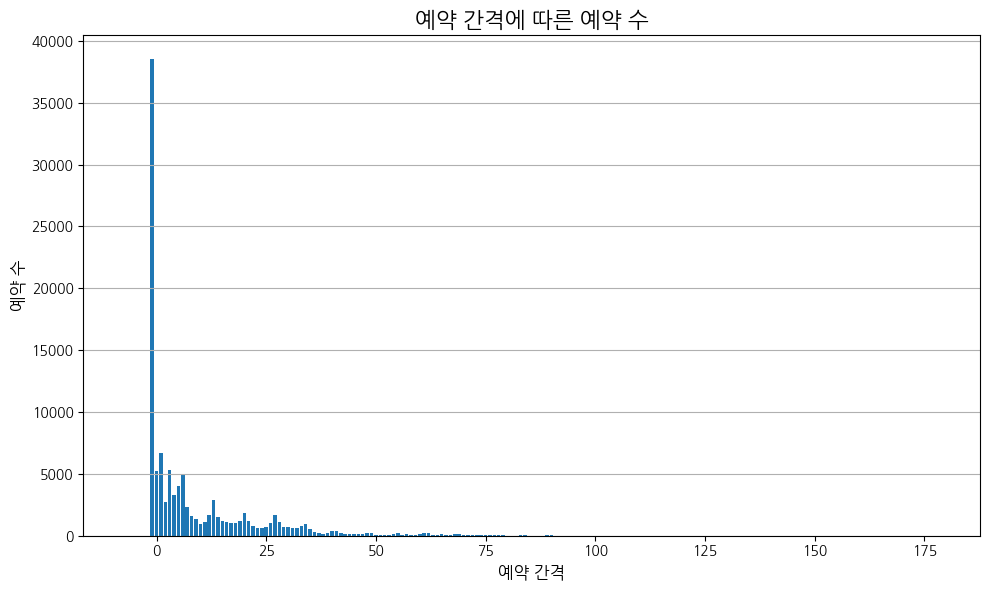

In [70]:
# 예약 횟수 계산
days_difference_count = df['DaysDifference'].value_counts().reset_index()
days_difference_count.columns = ['DaysDifference', 'Count']

# 오름차순 정렬
days_difference_count = days_difference_count.sort_values('DaysDifference')

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(days_difference_count['DaysDifference'], days_difference_count['Count'])
plt.title('예약 간격에 따른 예약 수', fontsize=16)
plt.xlabel('예약 간격', fontsize=12)
plt.ylabel('예약 수', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


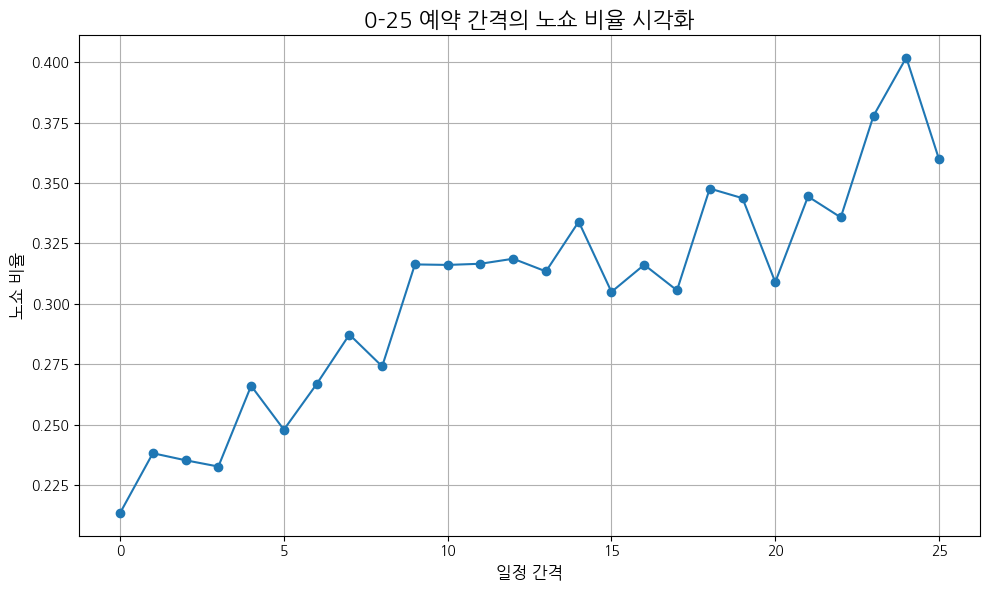

In [ ]:
# 예약 간격을 0부터 25까지 제한
filtered_data = df[(df['DaysDifference'] >= 0) & (df['DaysDifference'] <= 25)]

# 예약 간격에 따른 노쇼 비율 계산
noshow_rate_filtered = filtered_data.groupby('DaysDifference')['No-show'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(noshow_rate_filtered['DaysDifference'], noshow_rate_filtered['No-show'], marker='o')
plt.title('0-25 예약 간격의 노쇼 비율 시각화', fontsize=16)
plt.xlabel('예약 간격', fontsize=12)
plt.ylabel('노쇼 비율', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


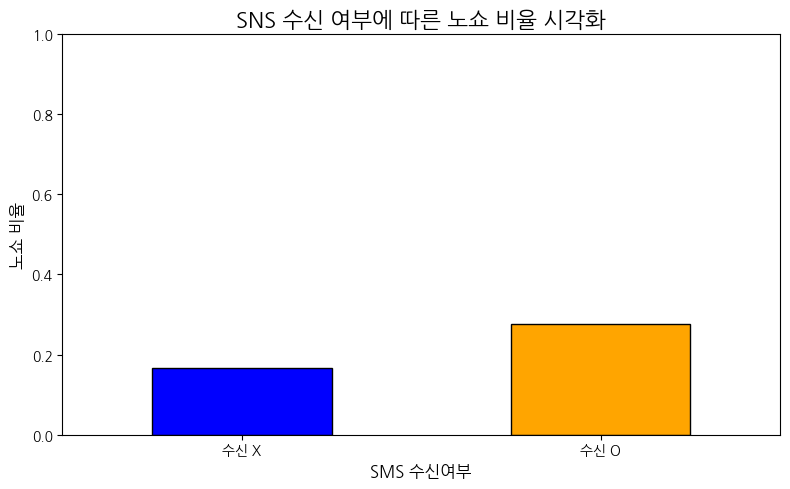

In [67]:
# SNS 수신에 따른 노쇼 비율 계산
sms_noshow_rate = df.groupby('SMS_received')['No-show'].apply(lambda x: (x == 'Yes').mean())

# 시각화
plt.figure(figsize=(8, 5))
sms_noshow_rate.plot(kind='bar', color=['blue', 'orange'], edgecolor='black')
plt.title('SNS 수신 여부에 따른 노쇼 비율 시각화', fontsize=16)
plt.xlabel('SMS 수신여부', fontsize=12)
plt.ylabel('노쇼 비율', fontsize=12)
plt.ylim(0, 1) 
plt.xticks([0, 1], labels=['수신 X', '수신 O'], rotation=0)
plt.tight_layout()
plt.show()

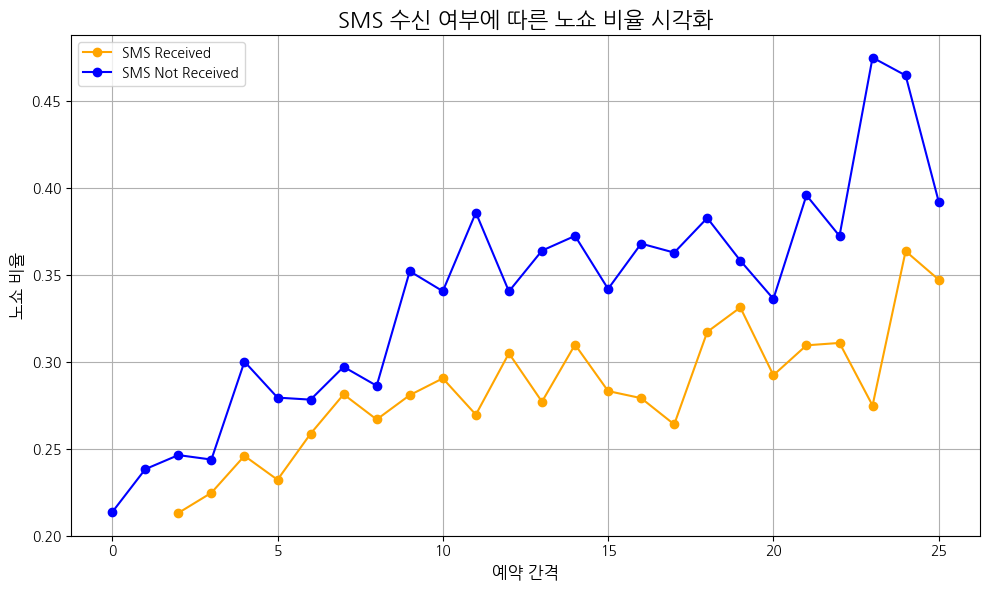

In [71]:
# 필터링(예약간격 0 ~ 25 사이의 SMS 수신을 받은 사람)
sms_filtered_data = df[(df['SMS_received'] == 1) & (df['DaysDifference'] >= 0) & (df['DaysDifference'] <= 25)]

# SMS 수신을 받은 사람의 노쇼 비율 계산
sms_noshow_rate_filtered = sms_filtered_data.groupby('DaysDifference')['No-show'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# 필터링(예약간격 0 ~ 25 사이의 SMS 수신을 받지 못한 사람)
no_sms_filtered_data = df[(df['SMS_received'] == 0) & (df['DaysDifference'] >= 0) & (df['DaysDifference'] <= 25)]

# SMS 수신을 받지 못한 사람의 노쇼 비율 계산
no_sms_noshow_rate_filtered = no_sms_filtered_data.groupby('DaysDifference')['No-show'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# SMS 수신O 그래프
plt.plot(sms_noshow_rate_filtered['DaysDifference'], sms_noshow_rate_filtered['No-show'], marker='o', color='orange', label='SMS Received')

# SMS 수신X 그래프
plt.plot(no_sms_noshow_rate_filtered['DaysDifference'], no_sms_noshow_rate_filtered['No-show'], marker='o', color='blue', label='SMS Not Received')

# 그래프 설정
plt.title('SMS 수신 여부에 따른 노쇼 비율 시각화', fontsize=16)
plt.xlabel('예약 간격', fontsize=12)
plt.ylabel('노쇼 비율', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##4-2.진료시간이 노쇼에 끼치는 영향

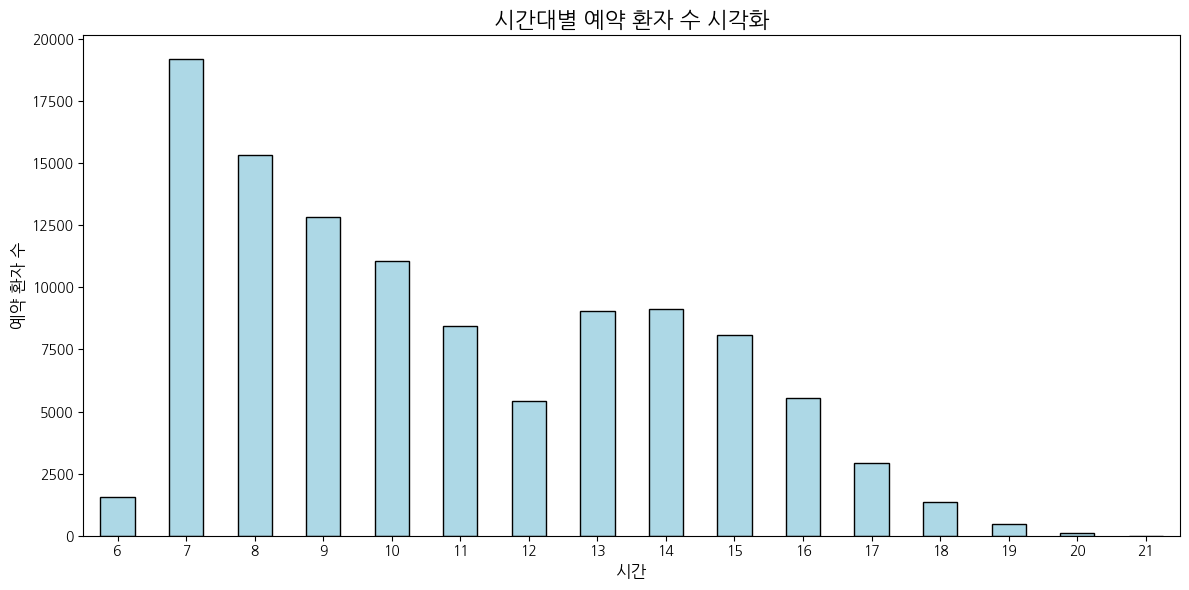

In [46]:
# 시간대별 환자 수 파악
hourly_patient_count = df['ScheduledHour'].value_counts().sort_index()

# 그래프 설정
plt.figure(figsize=(12, 6))
hourly_patient_count.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('시간대별 예약 환자 수 시각화', fontsize=16)
plt.xlabel('시간', fontsize=12)
plt.ylabel('예약 환자 수', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

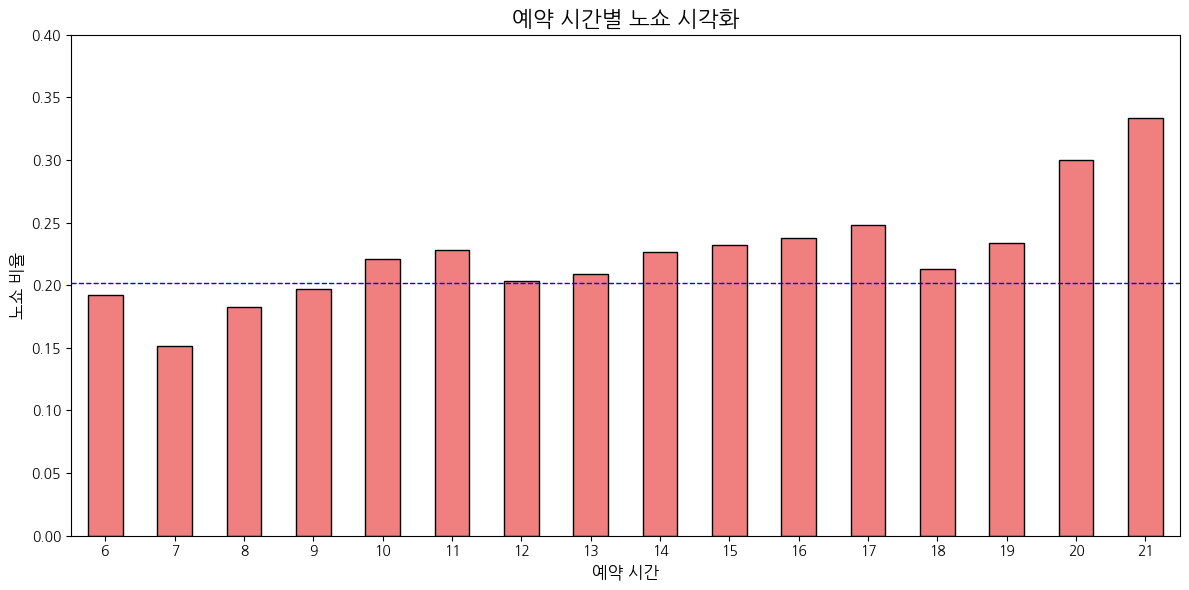

In [61]:
# 시간대별 노쇼 비율 계산
hourly_noshow_rate = df.groupby('ScheduledHour')['No-show'].apply(lambda x: (x == 'Yes').mean())

# 그래프 설정
plt.figure(figsize=(12, 6))
hourly_noshow_rate.plot(kind='bar', color='lightcoral', edgecolor='black')

# 평균 노쇼 파악선 추가(평균 : 0.219)
plt.axhline(y=0.2019, color='blue', linestyle='--', linewidth=1, label='Average No-show Rate')

# 추가 그래프 설정
plt.title('예약 시간별 노쇼 시각화', fontsize=16)
plt.xlabel('예약 시간', fontsize=12)
plt.ylabel('노쇼 비율', fontsize=12)
plt.ylim(0, 0.4)  
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


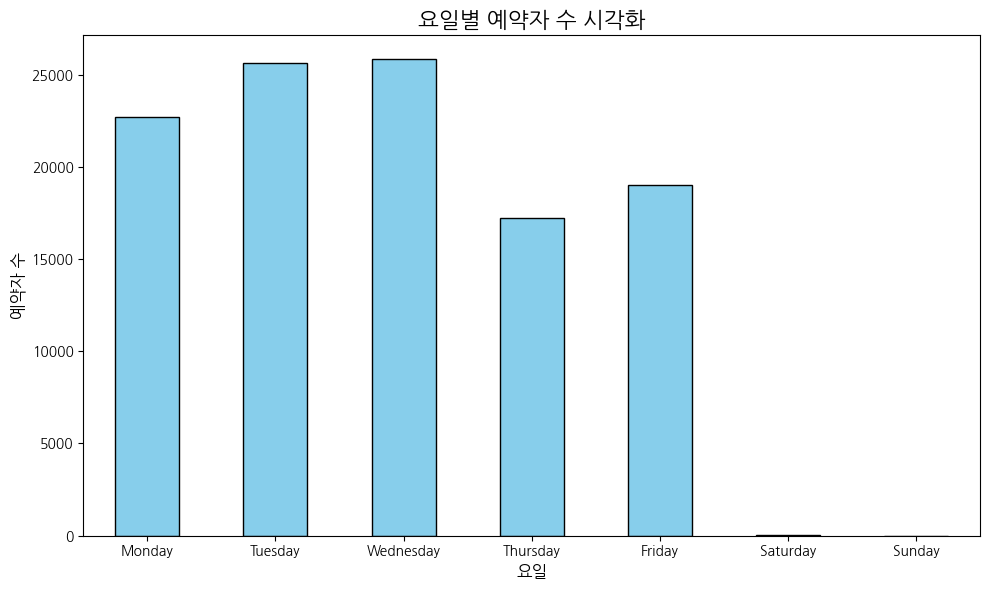

In [51]:
# 요일 별 예약자 수 계산
weekday_patient_count = df['AppointmentDay_Weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# 그래프 설정
plt.figure(figsize=(10, 6))
weekday_patient_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('요일별 예약자 수 시각화', fontsize=16)
plt.xlabel('요일', fontsize=12)
plt.ylabel('예약자 수', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##4-3.노쇼 모범도시 선정!

/var/folders/lk/sggln451135gjyqvmx929nrr0000gn/T/ipykernel_6780/1114779853.py:11: UserWarning: Glyph 195 (\N{LATIN CAPITAL LETTER A WITH TILDE}) missing from font(s) NanumGothic.
  plt.tight_layout()
/Users/ansejun/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 195 (\N{LATIN CAPITAL LETTER A WITH TILDE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


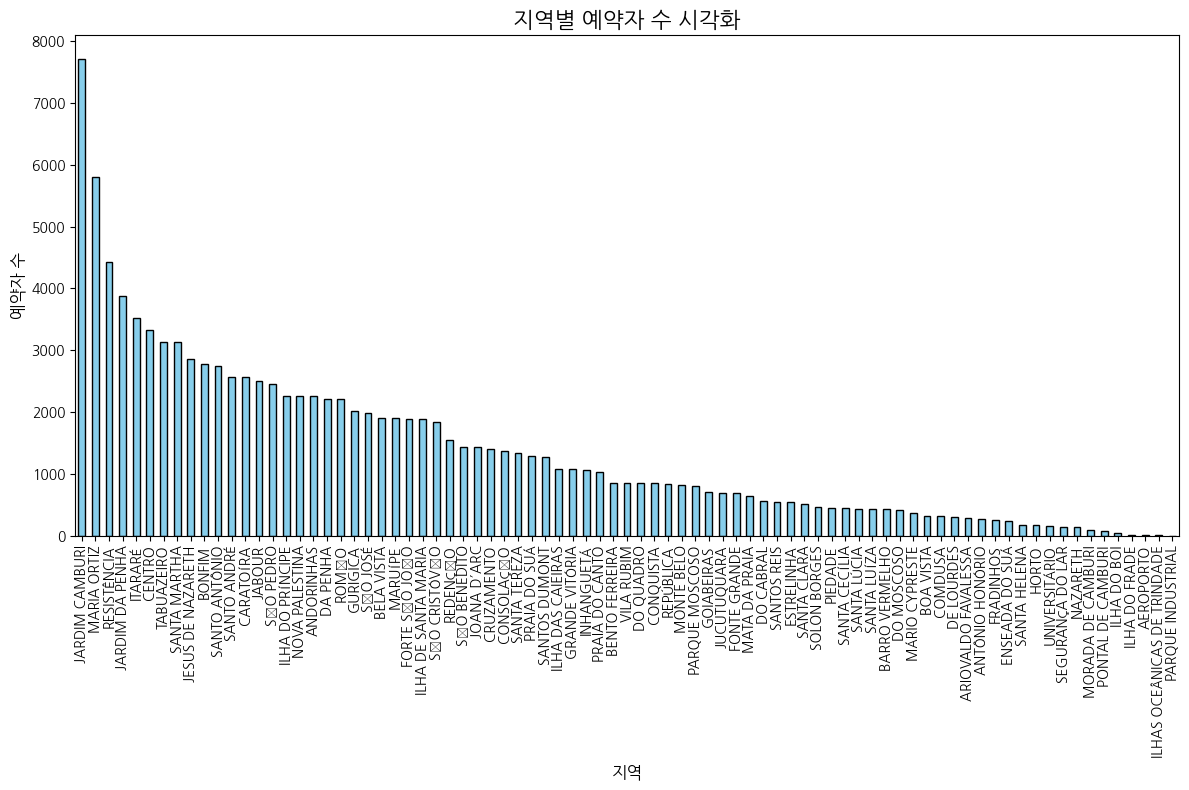

In [52]:
# 지역별 예약자 수 계산
day_difference_counts = df['Neighbourhood'].value_counts()

# 그래프 설정
plt.figure(figsize=(12, 8))
day_difference_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('지역별 예약자 수 시각화', fontsize=16)
plt.xlabel('지역', fontsize=12)
plt.ylabel('예약자 수', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/lk/sggln451135gjyqvmx929nrr0000gn/T/ipykernel_6780/1976805315.py:33: UserWarning: Glyph 195 (\N{LATIN CAPITAL LETTER A WITH TILDE}) missing from font(s) NanumGothic.
  plt.tight_layout()
/Users/ansejun/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 195 (\N{LATIN CAPITAL LETTER A WITH TILDE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


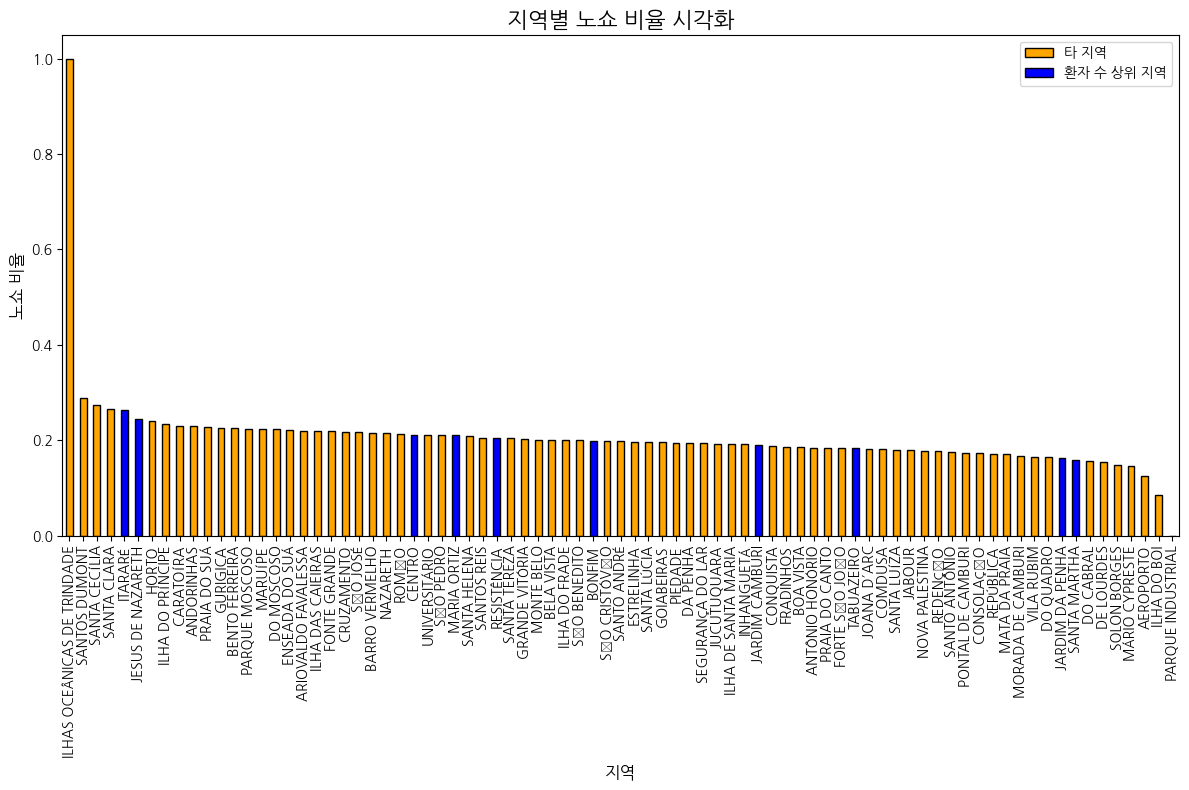

In [ ]:
# 강조할 지역들
highlighted_cities = ['JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA', 'JARDIM DA PENHA',
                      'ITARARÉ', 'CENTRO', 'TABUAZEIRO', 'SANTA MARTHA', 'JESUS DE NAZARETH', 'BONFIM']

# 지역별 노쇼 비율 계산
city_noshow_data = df.groupby(['Neighbourhood', 'No-show']).size().unstack(fill_value=0)
city_noshow_data['No-show Rate'] = city_noshow_data['Yes'] / city_noshow_data.sum(axis=1)

# 노쇼 비율 정렬
city_noshow_sorted = city_noshow_data['No-show Rate'].sort_values(ascending=False)

# 강조 색상 설정
colors = ['orange' if city not in highlighted_cities else 'blue' for city in city_noshow_sorted.index]

# 그래프 설정
plt.figure(figsize=(12, 8))
city_noshow_sorted.plot(kind='bar', color=colors, edgecolor='black')

plt.title('지역별 노쇼 비율 시각화', fontsize=16)
plt.xlabel('지역', fontsize=12)
plt.ylabel('노쇼 비율', fontsize=12)
plt.xticks(rotation=90)

# 범례 지역 추가
legend_elements = [
    Patch(facecolor='orange', edgecolor='black', label='타 지역'),
    Patch(facecolor='blue', edgecolor='black', label='환자 수 상위 지역')
]
plt.legend(handles=legend_elements, loc='upper right')

# 그래프 출력
plt.tight_layout()
plt.show()


/var/folders/lk/sggln451135gjyqvmx929nrr0000gn/T/ipykernel_6780/426478369.py:29: UserWarning: Glyph 195 (\N{LATIN CAPITAL LETTER A WITH TILDE}) missing from font(s) NanumGothic.
  plt.tight_layout()
/Users/ansejun/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 195 (\N{LATIN CAPITAL LETTER A WITH TILDE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


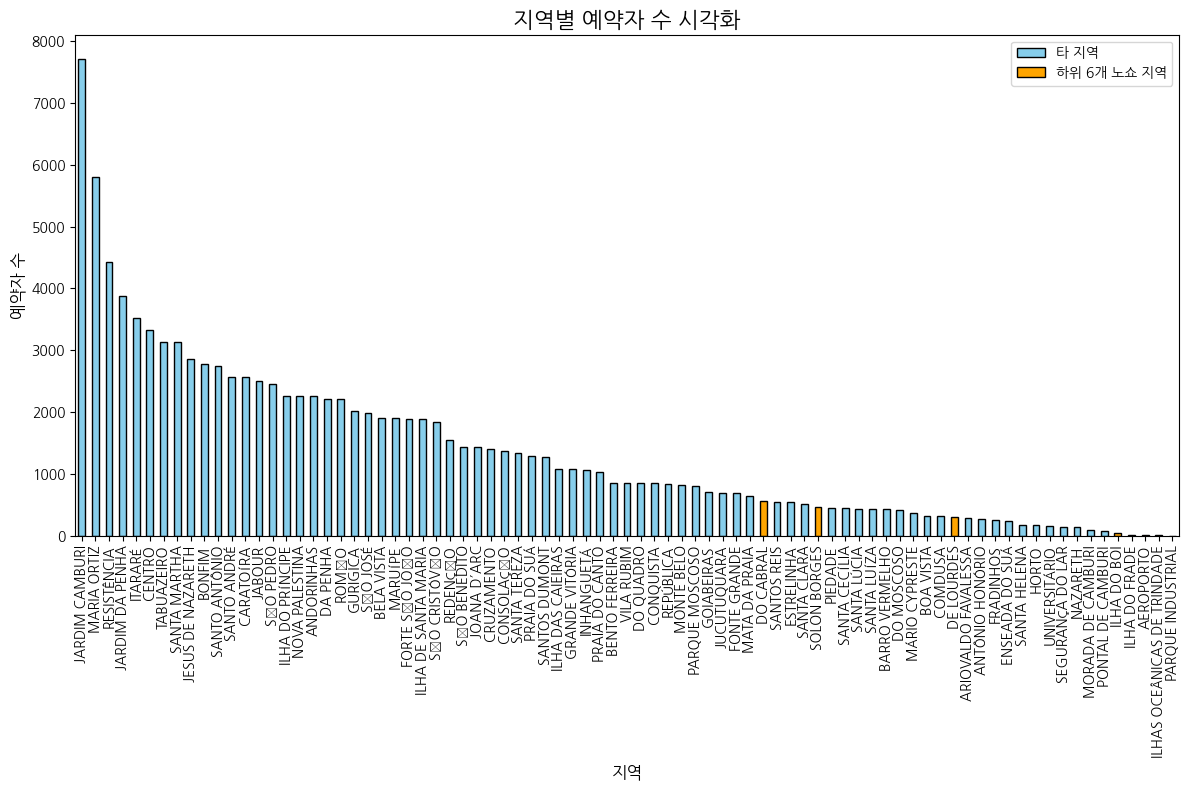

In [57]:
# 강조할 지역들
highlighted_neighbourhoods = [
    'DO CABRAL', 'DE LOURDES', 'SOLON BORGES',
    'MARIO CYPRESTE', 'AEROPORTO', 'ILHA DO BOI', 'PARQUE INDUSTRIAL'
]

# 지역별 예약자 수 계산
day_difference_counts = df['Neighbourhood'].value_counts()

# 강조 색상 설정
colors = ['skyblue' if city not in highlighted_neighbourhoods else 'orange' for city in day_difference_counts.index]

# 그래프 설정
plt.figure(figsize=(12, 8))
day_difference_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('지역별 예약자 수 시각화', fontsize=16)
plt.xlabel('지역', fontsize=12)
plt.ylabel('예약자 수', fontsize=12)
plt.xticks(rotation=90)

# 범례 추가
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='black', label='타 지역'),
    Patch(facecolor='orange', edgecolor='black', label='하위 6개 노쇼 지역')
]
plt.legend(handles=legend_elements, loc='upper right')

# 그래프 생성
plt.tight_layout()
plt.show()


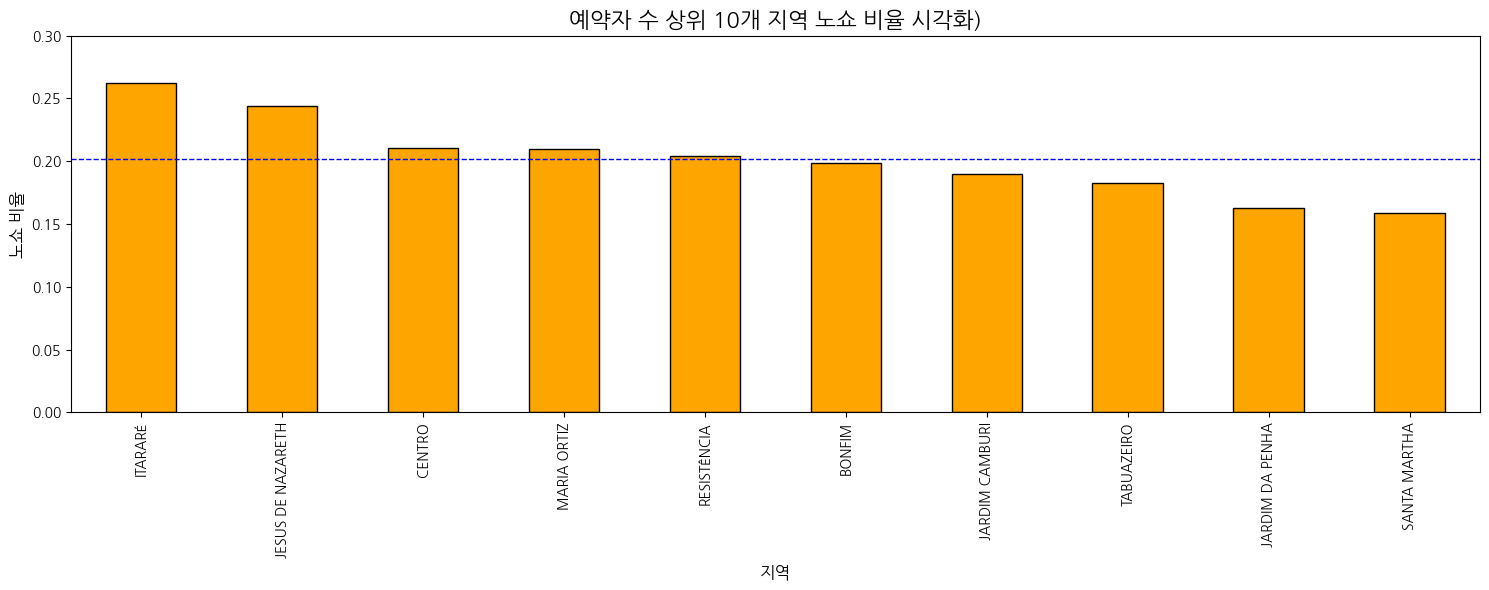

In [60]:
# 예약자 수 상위 10개 지역 필터링
filtered_data = df[
    (df['Neighbourhood'].isin(['JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA', 'JARDIM DA PENHA',
                      'ITARARÉ', 'CENTRO', 'TABUAZEIRO', 'SANTA MARTHA', 'JESUS DE NAZARETH', 'BONFIM']))
]

# 노쇼 비율 계산
city_noshow_rate_filtered = (
    filtered_data.groupby(['Neighbourhood', 'No-show'])
    .size()
    .unstack(fill_value=0)
)
city_noshow_rate_filtered['No-show Rate'] = (
    city_noshow_rate_filtered['Yes'] / city_noshow_rate_filtered.sum(axis=1)
)

# 노쇼 비율 정렬
city_noshow_rate_sorted = city_noshow_rate_filtered['No-show Rate'].sort_values(ascending=False)

# 그래프 설정
plt.figure(figsize=(15, 6))
city_noshow_rate_sorted.plot(kind='bar', color='orange', edgecolor='black')

# 평균 노쇼 기준선 추가(평균 : 0.2019)
plt.axhline(y=0.2019, color='blue', linestyle='--', linewidth=1, label='평균 노쇼 비율')

# 추가 그래프 설정
plt.title('예약자 수 상위 10개 지역 노쇼 비율 시각화)', fontsize=16)
plt.xlabel('지역', fontsize=12)
plt.ylabel('노쇼 비율', fontsize=12)
plt.ylim(0, 0.3)  
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [64]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'DaysDifference', 'ScheduledDay_Weekday', 'AppointmentDay_Weekday',
       'ScheduledHour'],
      dtype='object')